<a href="https://colab.research.google.com/github/Taosif041/EMSC-497-Lab-4.-Neural-Networks-module/blob/main/ml_work_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1 - Classification**

### **1. Import required libraries**

In [ ]:
# import some common packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

### **2. Import data and explore data**

In [ ]:
# Import built-in handwritten data (MNIST dataset) from keras
# Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images
# https://keras.io/datasets/#mnist-database-of-handwritten-digits

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Check the shape of the input data
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


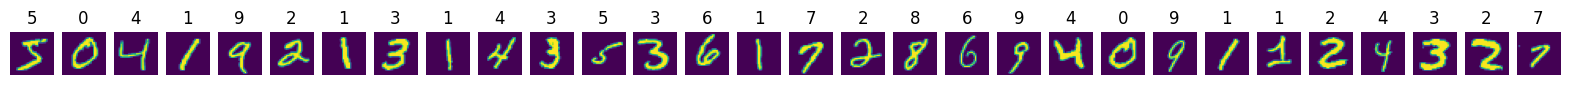

In [ ]:
# Plot some of the input data (first 30 examples)
fig, ax = plt.subplots(1, 30, figsize=(20,5))
for i in range(30):
    ax[i].imshow(x_train[i])
    ax[i].set_title(y_train[i])
    ax[i].axis('off')
plt.show()

In [ ]:
# The digit recognition problem can be casted as a classification task (ten classes)
# Turn the training labels (indicating which number each image is), into one-hot encoding
# e.g. 5 --> [0,0,0,0,0,1,0,0,0,0]

onehot_train = keras.utils.to_categorical(y_train, num_classes=10)
onehot_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# import packages
import keras
from keras.utils import plot_model
from keras.layers import Dense, Activation

### **3. Model 1: Convolutional Neural Network model ( Maxpooling)**

In [ ]:
# import CNN packages
import keras
from keras.models import Sequential,Model
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.optimizers import SGD, Adam


In [ ]:
def build_CNN1():
    model = keras.Sequential()
    # Multiple convolution operations to detect features in the images
    model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1))) # conv layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Dropout(0.4)) # reduce overfitting

    model.add(Conv2D(64,kernel_size=3,activation='relu')) # conv layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Dropout(0.4)) # reduce overfitting

    model.add(Conv2D(128,kernel_size=3,activation='relu')) # conv layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Dropout(0.4)) # reduce overfitting

    # Flattening and classification by standard ANN
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) # FC layer
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax')) # output layer, softmax activation for multiple classification problem

    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [ ]:
# Visualize the model structure
model1 = build_CNN1()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Bat  (None, 12, 12, 32)       

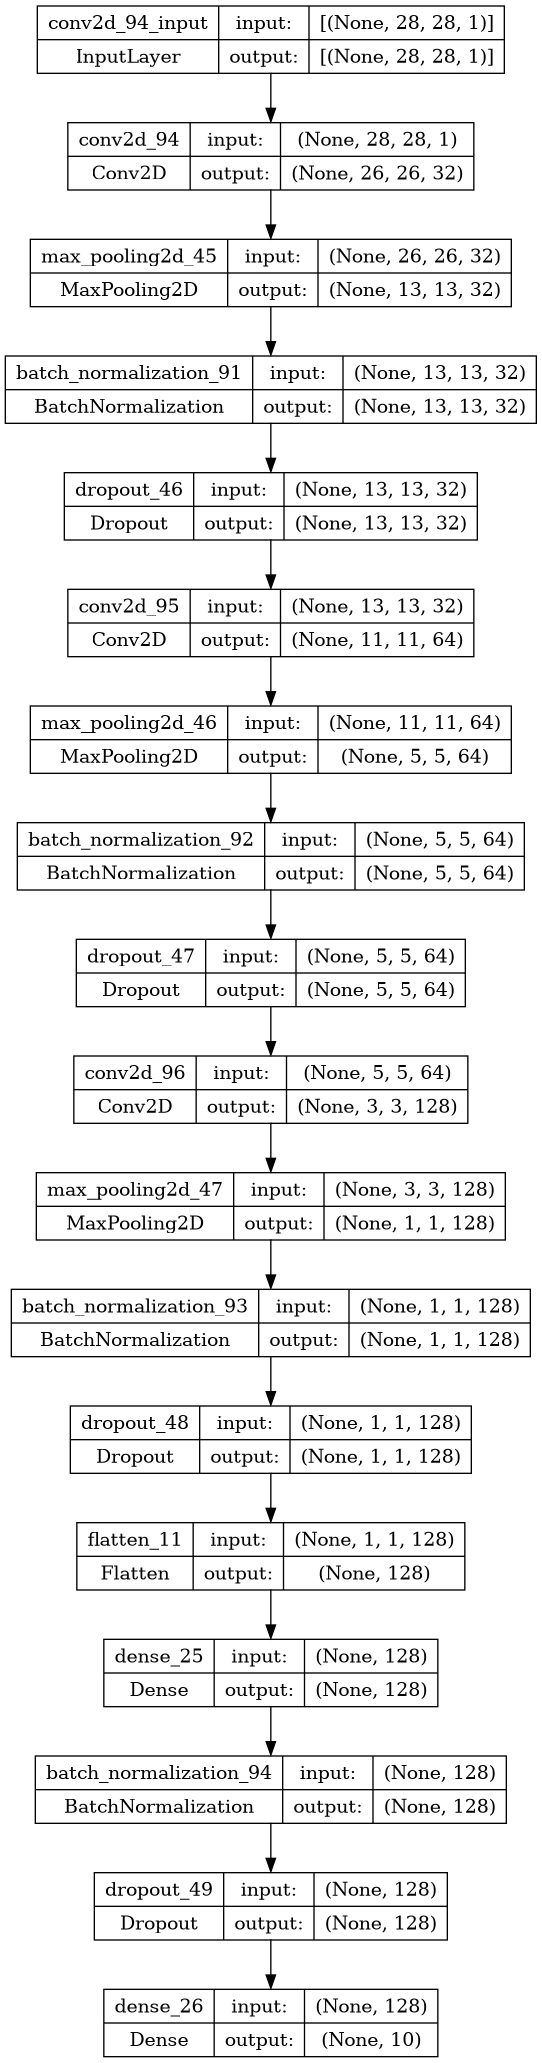

In [ ]:
# Visualize the model structure
plot_model(model1,show_shapes=True)

In [ ]:
# reshape the input data
x_train_cnn=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test_cnn=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

print(x_train_cnn.shape)
print(x_test_cnn.shape)

print(onehot_train.shape)
print(onehot_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
# CNN training, and store the training history
history1=model1.fit(x_train_cnn, onehot_train, batch_size=64, epochs=20,validation_split=0.1)

Epoch 1/20


2023-12-04 13:34:21.839357: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_26/dropout_46/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


844/844 [==============================] - 8s 6ms/step - loss: 0.5138 - accuracy: 0.8392 - val_loss: 0.0920 - val_accuracy: 0.9727
Epoch 2/20
844/844 [==============================] - 5s 6ms/step - loss: 0.1963 - accuracy: 0.9398 - val_loss: 0.0663 - val_accuracy: 0.9810
Epoch 3/20
844/844 [==============================] - 5s 6ms/step - loss: 0.1617 - accuracy: 0.9507 - val_loss: 0.0470 - val_accuracy: 0.9840
Epoch 4/20
844/844 [==============================] - 5s 6ms/step - loss: 0.1345 - accuracy: 0.9593 - val_loss: 0.0439 - val_accuracy: 0.9863
Epoch 5/20
844/844 [==============================] - 5s 6ms/step - loss: 0.1266 - accuracy: 0.9614 - val_loss: 0.0427 - val_accuracy: 0.9873
Epoch 6/20
844/844 [==============================] - 5s 6ms/step - loss: 0.1159 - accuracy: 0.9646 - val_loss: 0.0370 - val_accuracy: 0.9883
Epoch 7/20
844/844 [==============================] - 5s 6ms/step - loss: 0.1076 - accuracy: 0.9662 - val_loss: 0.0354 - val_accuracy: 0.9893
Epoch 8/20
844/84

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


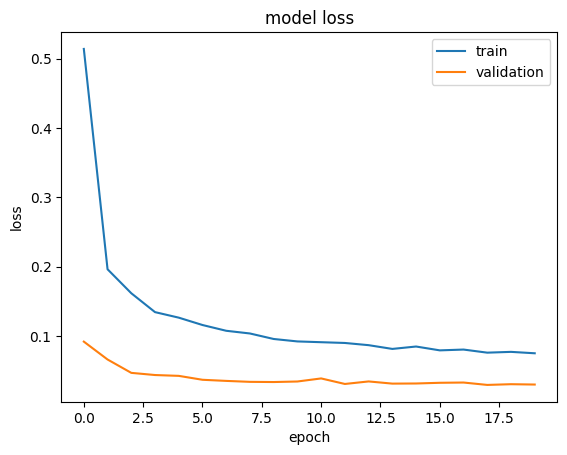

In [ ]:
# Plot the loss function variations over the training epochs
print(history1.history.keys())
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


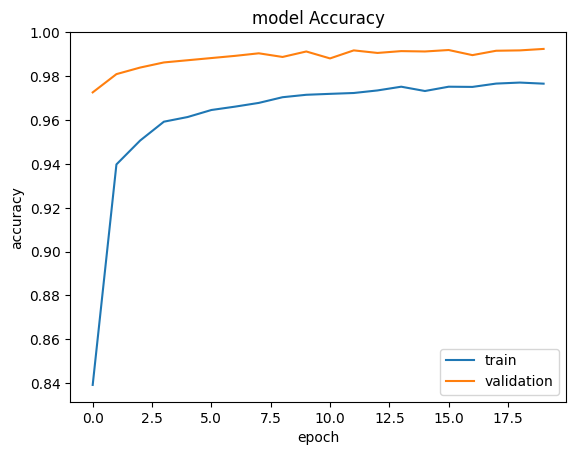

In [ ]:
# Plot the accuracy variations over the training epochs
print(history1.history.keys())
# "Loss"
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
# use test data to evaluate performance of model
# Returns the loss value & metrics value, which in this case is accuracy
loss1, accuracy = model1.evaluate(x=x_test_cnn, y=onehot_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0398 - accuracy: 0.9879


In [ ]:
# predict on test data
y_pred = model1.predict(x_test_cnn)

# select the indix with the maximum probability
y_pred_classes = np.argmax(y_pred,axis = 1)

313/313 [==============================] - 1s 2ms/step


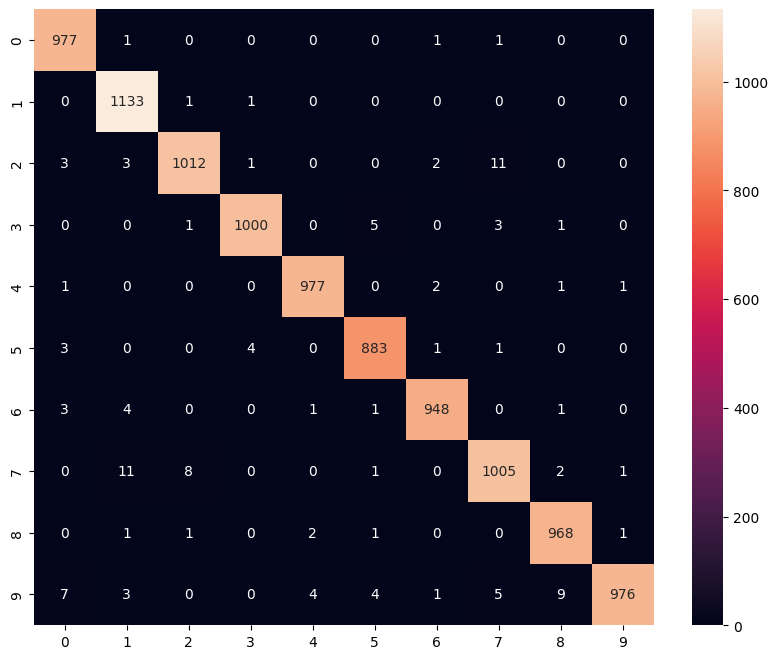

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True,fmt="d");

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming y_test is the true class labels for the test set
y_test_classes = np.argmax(onehot_test, axis=1)

# Accuracy
accuracy1 = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy1}')

# Precision
precision1 = precision_score(y_test_classes, y_pred_classes,average = 'weighted')
print(f'Precision: {precision1}')

# Recall
recall1 = recall_score(y_test_classes, y_pred_classes, average = 'weighted')
print(f'Recall: {recall1}')

# F1 Score
f11 = f1_score(y_test_classes, y_pred_classes, average = 'weighted')
print(f'F1 Score: {f11}')

Accuracy: 0.9879
Precision: 0.987955027395297
Recall: 0.9879
F1 Score: 0.9878859994169212


## **4. Model 2: Convolutional Neural Network model (Averagepooling)**

In [ ]:
def build_CNN2():
    model = keras.Sequential()

    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))  # conv layer
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Dropout(0.4))  # reduce overfitting

    model.add(Conv2D(64, kernel_size=3, activation='relu'))  # conv layer
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Dropout(0.4))  # reduce overfitting

    model.add(Conv2D(128, kernel_size=3, activation='relu'))  # conv layer
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())


    model.add(Dropout(0.4))  # reduce overfitting

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))  # FC layer
    model.add(BatchNormalization())

    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))  # output layer, softmax activation for multiple classification problems

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:
# Visualize the model structure
model2=build_CNN2()
model2.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_27 (Aver  (None, 13, 13, 32)        0         
 agePooling2D)                                                   
                                                                 
 batch_normalization_99 (Ba  (None, 13, 13, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_53 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_101 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_28 (Aver  (None, 5, 5, 64)        

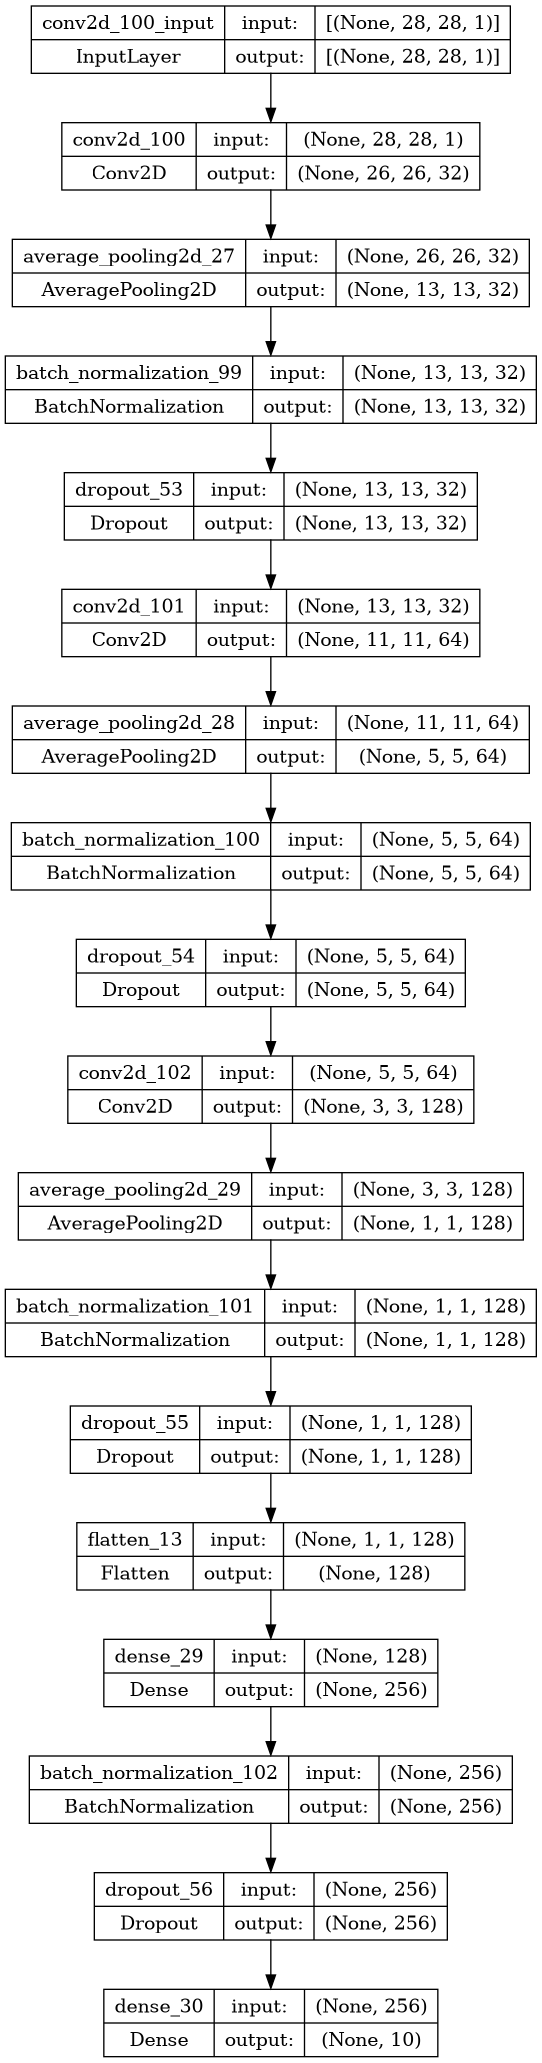

In [ ]:
# Visualize the model structure
plot_model(model2,show_shapes=True)

In [ ]:
history2=model2.fit(x_train_cnn, onehot_train, batch_size=64, epochs=20,validation_split=0.1)

Epoch 1/20


2023-12-04 13:39:36.790708: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_28/dropout_53/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


844/844 [==============================] - 8s 6ms/step - loss: 0.4384 - accuracy: 0.8627 - val_loss: 0.0872 - val_accuracy: 0.9735
Epoch 2/20
844/844 [==============================] - 5s 6ms/step - loss: 0.2055 - accuracy: 0.9356 - val_loss: 0.0625 - val_accuracy: 0.9813
Epoch 3/20
844/844 [==============================] - 5s 6ms/step - loss: 0.1677 - accuracy: 0.9477 - val_loss: 0.0569 - val_accuracy: 0.9825
Epoch 4/20
844/844 [==============================] - 5s 6ms/step - loss: 0.1444 - accuracy: 0.9556 - val_loss: 0.0484 - val_accuracy: 0.9853
Epoch 5/20
844/844 [==============================] - 5s 6ms/step - loss: 0.1385 - accuracy: 0.9568 - val_loss: 0.0524 - val_accuracy: 0.9840
Epoch 6/20
844/844 [==============================] - 5s 5ms/step - loss: 0.1251 - accuracy: 0.9616 - val_loss: 0.0414 - val_accuracy: 0.9875
Epoch 7/20
844/844 [==============================] - 5s 6ms/step - loss: 0.1145 - accuracy: 0.9637 - val_loss: 0.0421 - val_accuracy: 0.9872
Epoch 8/20
844/84

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


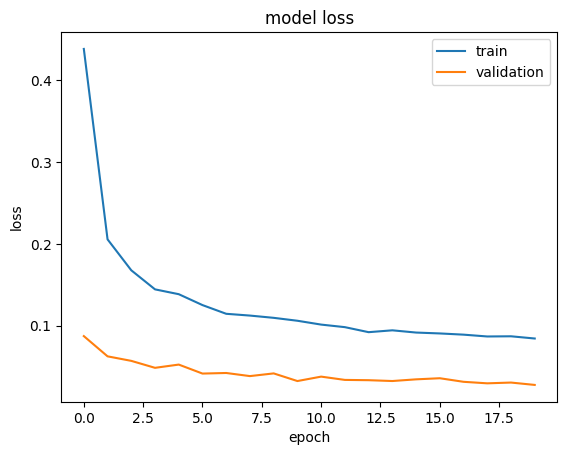

In [ ]:
# Plot the loss function variations over the training epochs
print(history2.history.keys())
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


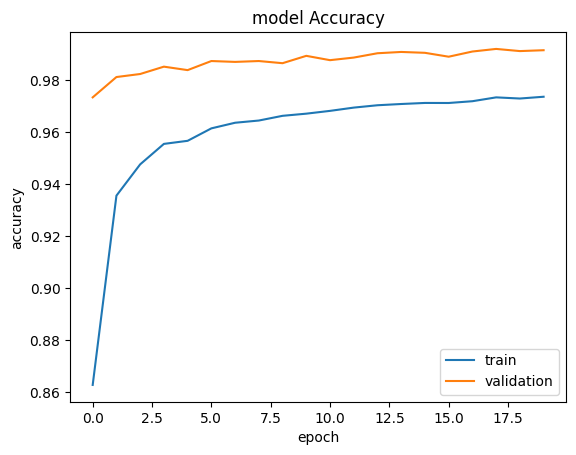

In [ ]:
# Plot the accuracy variations over the training epochs
print(history2.history.keys())
# "Loss"
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
# use test data to evaluate performance of model
# Returns the loss value & metrics value, which in this case is accuracy
loss2, accuracy=model2.evaluate(x=x_test_cnn, y=onehot_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0588 - accuracy: 0.9827


In [ ]:
# predict on test data
y_pred = model2.predict(x_test_cnn)

# select the indix with the maximum probability
y_pred_classes = np.argmax(y_pred,axis = 1)

313/313 [==============================] - 1s 2ms/step


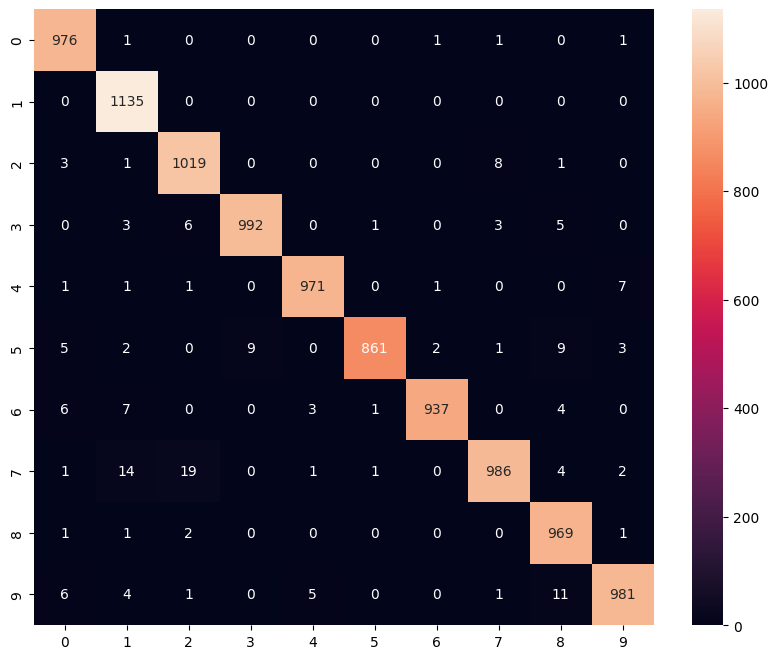

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True,fmt="d");

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_test_classes = np.argmax(onehot_test, axis=1)

# Accuracy
accuracy2 = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy2}')

# Precision
precision2 = precision_score(y_test_classes, y_pred_classes,average = 'weighted')
print(f'Precision: {precision2}')

# Recall
recall2 = recall_score(y_test_classes, y_pred_classes, average = 'weighted')
print(f'Recall: {recall2}')

# F1 Score
f12 = f1_score(y_test_classes, y_pred_classes, average = 'weighted')
print(f'F1 Score: {f12}')

Accuracy: 0.9827
Precision: 0.9828994358636468
Recall: 0.9827
F1 Score: 0.9826841179529272


### **5. Convolutional Neural Network model (Tutorial)**

In [ ]:
def build_CNN3():
    model = keras.Sequential()
    # Multiple convolution operations to detect features in the images
    model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1))) # conv layer
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=3,activation='relu')) # conv layer, no need to specify shape as there is a layer before
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu')) # conv layer, padding + stride
    model.add(BatchNormalization())
    model.add(Dropout(0.4)) # reduce overfitting

    model.add(Conv2D(64,kernel_size=3,activation='relu')) # conv layer
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_size=3,activation='relu')) # conv layer
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu')) # conv layer, padding + stride
    model.add(BatchNormalization())
    model.add(Dropout(0.4)) # reduce overfitting

    # Flattening and classification by standard ANN
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) # FC layer
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax')) # output layer, softmax activation for multiple classification problem

    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [ ]:
# Visualize the model structure
model3=build_CNN3()
model3.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_103 (B  (None, 26, 26, 32)        128       
 atchNormalization)                                              
                                                                 
 conv2d_104 (Conv2D)         (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_104 (B  (None, 24, 24, 32)        128       
 atchNormalization)                                              
                                                                 
 conv2d_105 (Conv2D)         (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_105 (B  (None, 12, 12, 32)      

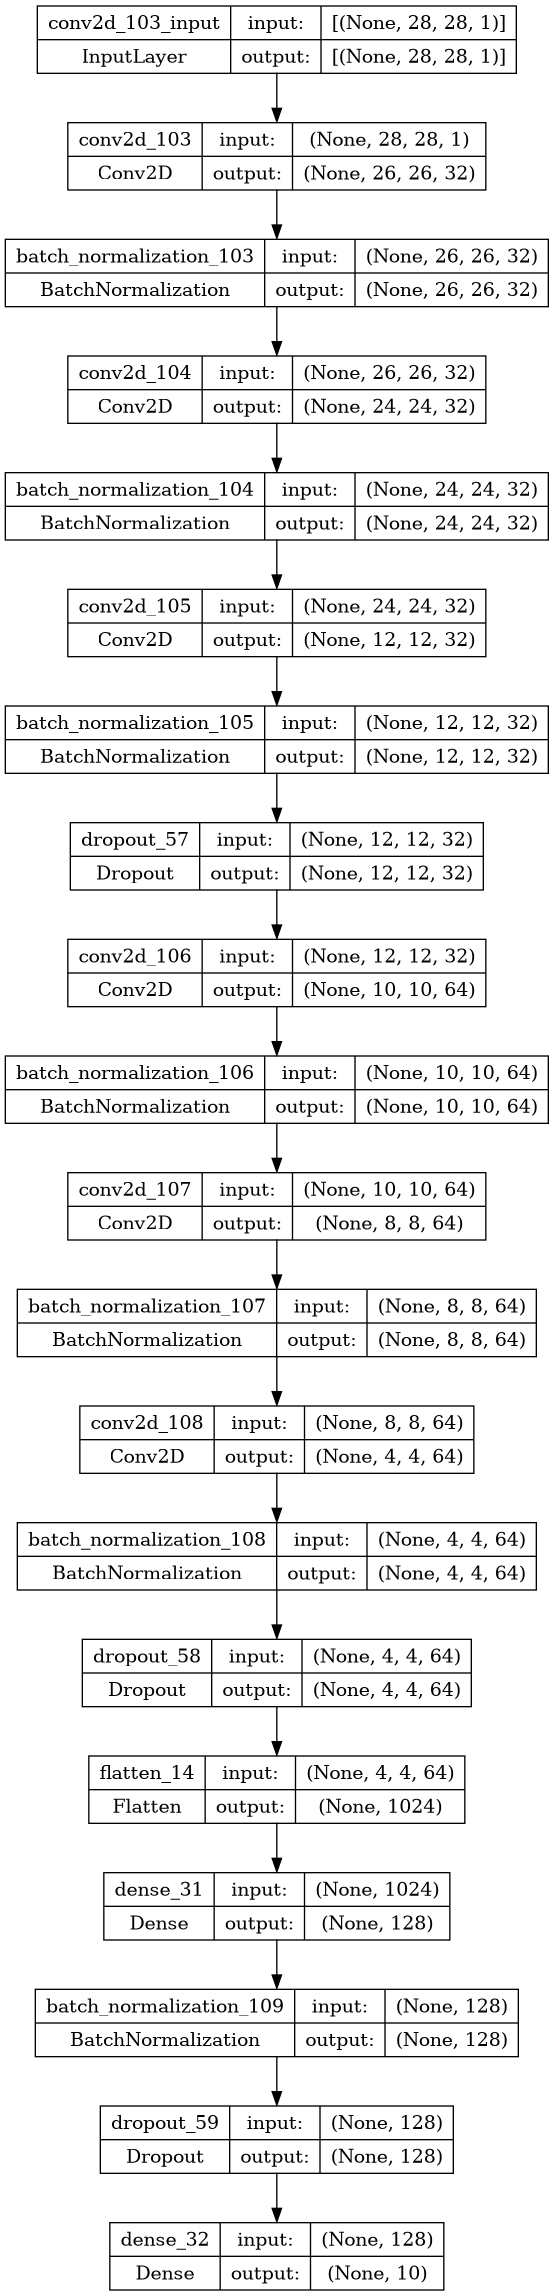

In [ ]:
# Visualize the model structure
plot_model(model3,show_shapes=True)

In [ ]:
# CNN training, and store the training history
history3=model3.fit(x_train_cnn, onehot_train, batch_size=64, epochs=20,validation_split=0.1)

Epoch 1/20


2023-12-04 13:44:21.674472: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_29/dropout_57/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


844/844 [==============================] - 12s 8ms/step - loss: 0.2250 - accuracy: 0.9309 - val_loss: 0.0746 - val_accuracy: 0.9785
Epoch 2/20
844/844 [==============================] - 7s 8ms/step - loss: 0.0723 - accuracy: 0.9772 - val_loss: 0.0295 - val_accuracy: 0.9918
Epoch 3/20
844/844 [==============================] - 7s 8ms/step - loss: 0.0556 - accuracy: 0.9833 - val_loss: 0.0290 - val_accuracy: 0.9912
Epoch 4/20
844/844 [==============================] - 7s 8ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0313 - val_accuracy: 0.9910
Epoch 5/20
844/844 [==============================] - 7s 8ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0307 - val_accuracy: 0.9918
Epoch 6/20
844/844 [==============================] - 7s 8ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0244 - val_accuracy: 0.9923
Epoch 7/20
844/844 [==============================] - 7s 8ms/step - loss: 0.0335 - accuracy: 0.9899 - val_loss: 0.0235 - val_accuracy: 0.9928
Epoch 8/20
844/8

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


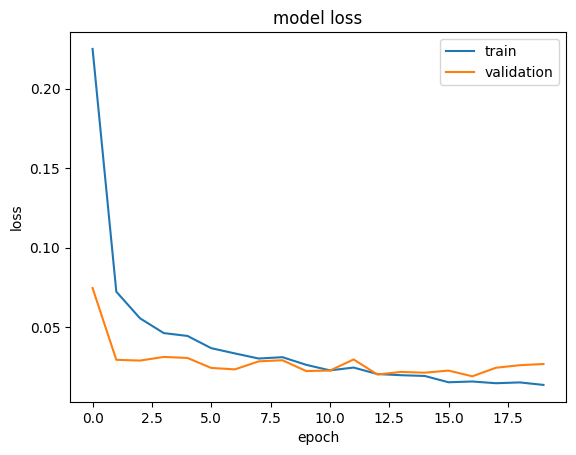

In [ ]:
# Plot the loss function variations over the training epochs
print(history3.history.keys())
# "Loss"
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


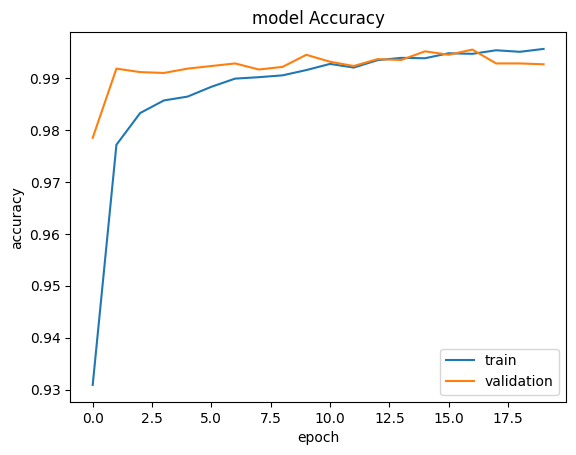

In [ ]:
# Plot the accuracy variations over the training epochs
print(history3.history.keys())
# "Loss"
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
# use test data to evaluate performance of model
# Returns the loss value & metrics value, which in this case is accuracy
loss3, accuracy = model3.evaluate(x=x_test_cnn, y=onehot_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0187 - accuracy: 0.9950


In [ ]:
# predict on test data
y_pred = model3.predict(x_test_cnn)

# select the indix with the maximum probability
y_pred_classes = np.argmax(y_pred,axis = 1)

313/313 [==============================] - 1s 2ms/step


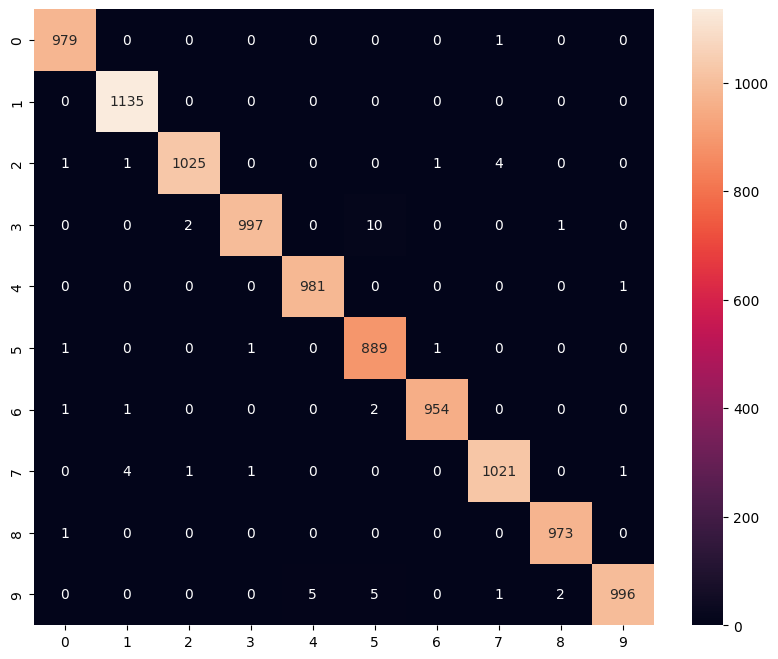

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True,fmt="d");

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming y_test is the true class labels for the test set
y_test_classes = np.argmax(onehot_test, axis=1)

# Accuracy
accuracy3 = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy3}')

# Precision
precision3 = precision_score(y_test_classes, y_pred_classes,average = 'weighted')
print(f'Precision: {precision3}')

# Recall
recall3 = recall_score(y_test_classes, y_pred_classes, average = 'weighted')
print(f'Recall: {recall3}')

# F1 Score
f13 = f1_score(y_test_classes, y_pred_classes, average = 'weighted')
print(f'F1 Score: {f13}')

Accuracy: 0.995
Precision: 0.9950267117850792
Recall: 0.995
F1 Score: 0.9949999564544662


# **Comparison**

In [ ]:
data = {
    'CNN_Max-pool': [accuracy1, precision1, recall1, f11, loss1],
    'CNN_Avg-pool': [accuracy2, precision2, recall2, f12, loss2],
    'Tutorial': [accuracy3, precision3, recall3, f13, loss3]
}

# Set the metric as the index
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Loss']
comparison_table = pd.DataFrame(data, index=metrics)
comparison_table = comparison_table.transpose()
comparison_table

,Accuracy,Precision,Recall,F1 Score,Loss
CNN_Max-pool,0.9879,0.987955,0.9879,0.987886,0.039847
CNN_Avg-pool,0.9827,0.982899,0.9827,0.982684,0.058832
Tutorial,0.9950,0.995027,0.9950,0.995000,0.018748
